## Observations and Insights

1. From the Final Tumor Size by Drug Regimen box plot below, of the four promising drugs, capomulin and Ramicane had the greatest effect on controlling the growth of the tumor. One hypothsis to take away from a comparison between Capomulin and Ramicane is that Ramicane appears to have a tighter distribution which suggests it is a slightly more affective treatment regimen.

2. The data obtained from a random mouse from the Capomulin study, mouse i557's tumor appeared to shrink in the first stages of treatment. However, starting shortly after day 5, mouse i557 experienced a steady growth in it's tumor size over the remainder of the study.

3. Analysis of Average Tumor Size vs. Weight for the Capomulin study shows a positive relationship between the weight of a mouse and a larger tumor size. This information is further backed up by the strong positive correlation (0.877) between tumor size and weight calculated from the data.

In [287]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_df = pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')

# Display the data table for preview

combined_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [288]:
clean_study_df = combined_study_df.drop_duplicates(['Mouse ID','Timepoint'],keep=False)
total = len(clean_study_df['Mouse ID'].unique())
print(f'Total Mice: {total}')

Total Mice: 249


In [289]:
clean_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [290]:
# Generate a summary statistics table consisting of the mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each drug regimen.

# Using the aggregation method, produce the same summary statistics in a single line
summary_stat_table = clean_study_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':
                                                                   ['mean','median','var','std','sem']})
summary_stat_table = summary_stat_table.reset_index(drop=False)
summary_stat_table

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.458254  50.854632  44.053659  6.637293  0.540135
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

In [291]:
# Generate a summary statistics table consisting of the mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each drug regimen.

# Assemble the resulting series into a single summary dataframe.

trial_drugs = []
tumor_average = []
tumor_median = []
tumor_var = []
tumor_std = []
tumor_sem = []

for drug in clean_study_df['Drug Regimen']:
    if drug in trial_drugs:
        continue
    else:
        # append drug name into list 
        trial_drugs.append(drug)
        
        # locate tumor volume for associated with each drug
        rex = clean_study_df.loc[clean_study_df['Drug Regimen']==drug,['Tumor Volume (mm3)']]
        
        # calculate summary statistics for each drug
        mean_d = rex.mean()
        med_d = rex.median()
        var_d = np.var(rex)
        std_d = np.std(rex)
        sem_d = st.sem(rex)
        
        # append summary statistics for each drug into list above
        tumor_average.append(mean_d[0])
        tumor_median.append(med_d[0])
        tumor_var.append(var_d[0])
        tumor_std.append(std_d[0])
        tumor_sem.append(sem_d[0])
        


# create new data fram to hold the summary statistics        
summary_table = pd.DataFrame({'Drug Regimen':trial_drugs,
                              'Tumor Mean':tumor_average,
                              'Tumor Median':tumor_median,
                              'Tumor Variance':tumor_var,
                              'Tumor STD':tumor_std,
                              'Tumor SEM':tumor_sem})

summary_table = summary_table.sort_values(['Drug Regimen'])
summary_table = summary_table.reset_index(drop=True)
summary_table

,Drug Regimen,Tumor Mean,Tumor Median,Tumor Variance,Tumor STD,Tumor SEM
0,Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
1,Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
2,Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
3,Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
4,Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
5,Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
6,Propriva,52.458254,50.854632,43.761912,6.615279,0.540135
7,Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
8,Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
9,Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398


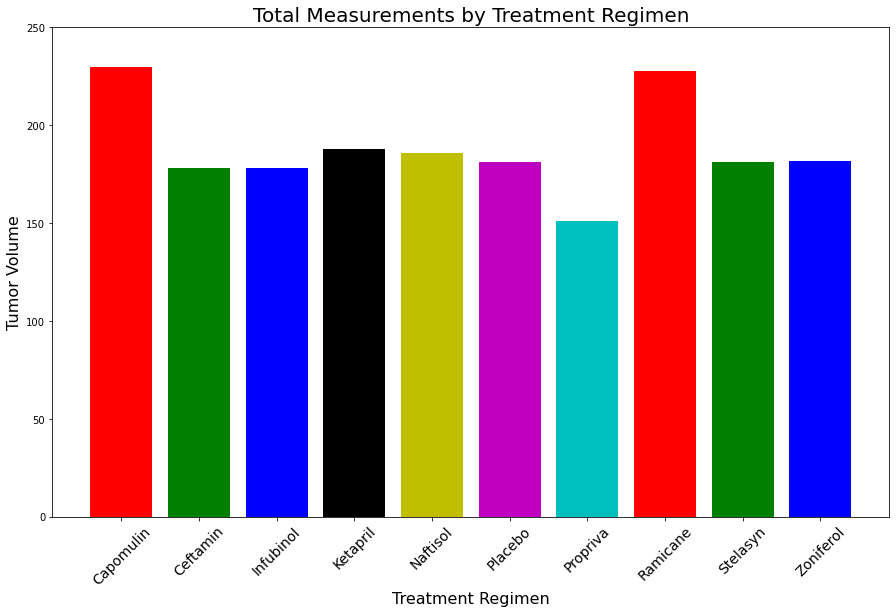

In [313]:
#Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
#that shows the total number of measurements taken for each treatment regimen throughout the course of the study.

group_study_df = clean_study_df.groupby(['Drug Regimen']).count()
group_study_df = group_study_df.reset_index(drop=False)

x_axis = np.arange(len(group_study_df))
y_axis = group_study_df['Tumor Volume (mm3)']
tick_location = [value for value in x_axis]

## Plot Bar Graph
plt.figure(figsize=(15,9))
plt.bar(x_axis,y_axis,color=['r','g','b','k','y','m','c'])
plt.xticks(tick_location,group_study_df['Drug Regimen'],rotation=45,fontsize=14,)
plt.title('Total Measurements by Treatment Regimen',fontsize=20)
plt.xlabel('Treatment Regimen',fontsize=16)
plt.ylabel('Tumor Volume',fontsize=16)
plt.ylim(0,250)


plt.show()

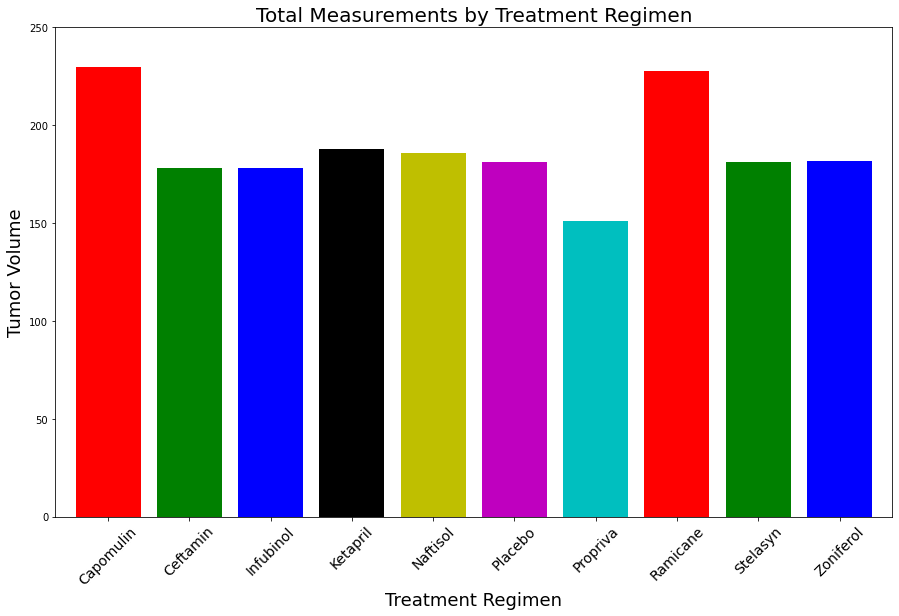

In [314]:
## Graph pandas




plot_pandas = group_study_df['Tumor Volume (mm3)'].plot(kind='bar',ylabel='Tumor Volume',
                                                        title='Total Measurements by Treatment Regimen',legend=False,
                                                        figsize=(15,9),ylim=(0,250),width=.8,
                                                        color=['r','g','b','k','y','m','c'])

xticks = [value for value in x_axis]
plt.xticks(tick_location,group_study_df['Drug Regimen'],rotation='45',fontsize=14)
plt.title('Total Measurements by Treatment Regimen',fontsize=20)
plt.xlabel('Treatment Regimen',fontsize=18)
plt.ylabel('Tumor Volume',fontsize=18)
my_colors = 'rgbkymc'

plt.show()

Text(0.5, 1.0, 'Distribution of Female to Male Mice')

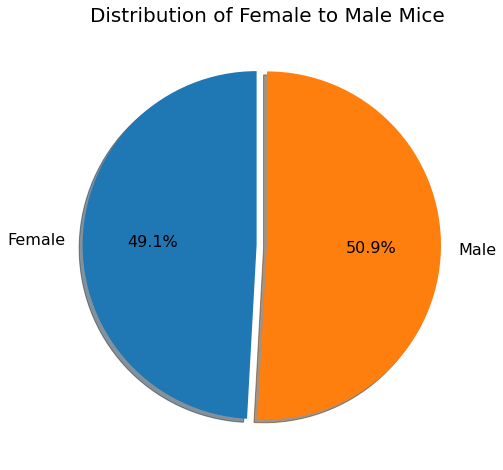

In [315]:
## Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
## that shows the distribution of female or male mice in the study.

group_gender_df = clean_study_df.groupby('Sex').count()
pie_chart = group_gender_df['Tumor Volume (mm3)'].plot(kind='pie',autopct='%1.1f%%',fontsize=16,figsize=(8,8),
                                                       startangle=90,explode=(0.06,0),
                                                      shadow=True)
plt.ylabel('')
plt.title('Distribution of Female to Male Mice',fontsize=20)


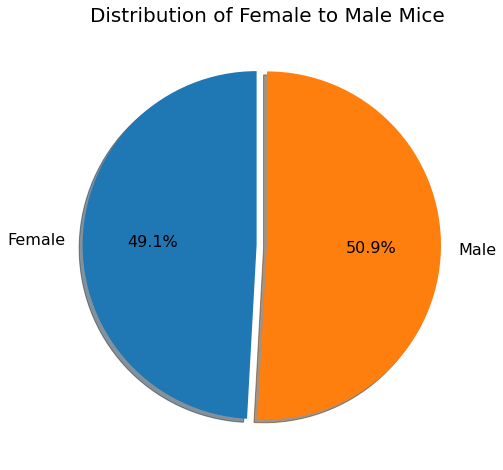

In [316]:
new_df = group_gender_df.reset_index(drop=False)


labels = new_df['Sex']
size = new_df['Tumor Volume (mm3)']
plt.figure(figsize=(8,8))
plt.pie(size,labels=labels,autopct='%1.1f%%',explode=(0.06,0),shadow=True,startangle=90,
        textprops={'fontsize':16})

plt.title('Distribution of Female to Male Mice',fontsize=20)



plt.show()

In [317]:
## Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
## Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and 
## quantitatively determine if there are any potential outliers across all four treatment regimens.

## created a Data Frame of mice in the Capomulin, Ramicane, Infubinol, and Ceftamin Treatment Regimens

Capomulin = clean_study_df.loc[clean_study_df['Drug Regimen']=='Capomulin']
Ramicane = clean_study_df.loc[clean_study_df['Drug Regimen']=='Ramicane']
Infubinol = clean_study_df.loc[clean_study_df['Drug Regimen']=='Infubinol']
Ceftamin = clean_study_df.loc[clean_study_df['Drug Regimen']=='Ceftamin']

## pd.concat the 4 data frames from above for analysis
success_study_df = pd.concat([Capomulin,Ramicane,Infubinol,Ceftamin])
success_study_df = success_study_df.sort_values(['Mouse ID'],ascending=True)

## Group by Mouse ID from success _study_df to find final timepoint for each mouse
## and save in variable for .loc later

success_group_df = success_study_df.groupby(['Mouse ID']).max()
final_timepoints = success_group_df['Timepoint']


In [318]:
## Merge together 2 data frames to include final timepoints and clean up for analysis
new_group_df = pd.merge(success_study_df,success_group_df,how='inner',on='Mouse ID')

## Drop duplicate columns
new_group_df = new_group_df.drop(columns=['Drug Regimen_y','Sex_y','Age_months_y','Weight (g)_y','Metastatic Sites_y',
                                          'Tumor Volume (mm3)_y'])

## Rename columns
new_group_df = new_group_df.rename(columns={'Drug Regimen_x':'Drug Regimen','Sex_x':'Sex','Age_months_x':'Age_months',
                                           'Weight (g)_x':'Weight (g)','Timepoint_x':'Timepoint',
                                            'Tumor Volume (mm3)_x':'Tumor Volume (mm3)',
                                           'Metastatic Sites_x':'Metastatic Sites','Timepoint_y':'Final Timepoint'})

## Sort and reset index
new_group_df = new_group_df.sort_values(['Mouse ID','Timepoint'],ascending=[True,True])
new_group_df = new_group_df.reset_index(drop=True)

## Use locate to return new data frame for each mouse's final data
final_study_df = new_group_df.loc[new_group_df['Timepoint']==new_group_df['Final Timepoint']]
#final_study_df 

In [319]:
## Calculate the IQR, Quartiles and outliers
quartiles = final_study_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr) 

print(upper_bound)
print(upperq)
print(iqr)
print(lowerq)
print(lower_bound)

## Find any outliers in the final_study_df Data Frame

upper_outliers = final_study_df.loc[(final_study_df['Tumor Volume (mm3)']>upper_bound)]
lower_outliers = final_study_df.loc[(final_study_df['Tumor Volume (mm3)']<lower_bound)]

upper_outliers
lower_outliers

94.04403868375002
59.930261755000004
22.74251795250001
37.187743802499995
3.0739668737499812


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Timepoint


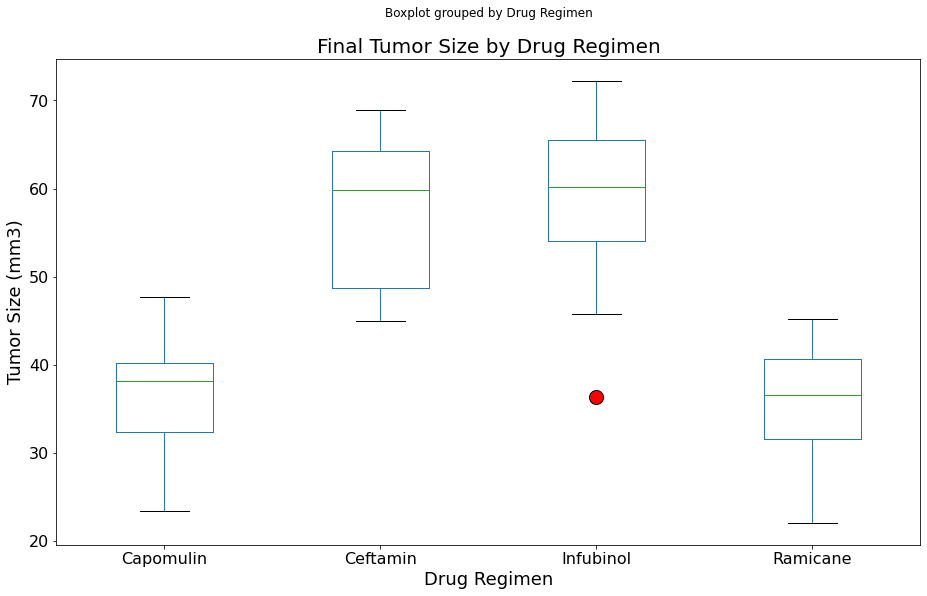

In [320]:
## Generate Scatter Plot represting final tumor size for each mouse in Capomulin, Ramicane, Infubinol, and Ceftamin

final_study_df.boxplot(['Tumor Volume (mm3)'],['Drug Regimen'],grid=False,figsize=(15,9),
                       fontsize=16,flierprops={'marker':'o','markersize':14,'markerfacecolor':'red'})

plt.title('Final Tumor Size by Drug Regimen',fontsize=20)
plt.xlabel('Drug Regimen',fontsize=18)
plt.ylabel('Tumor Size (mm3)',fontsize=18)
                    
plt.show()

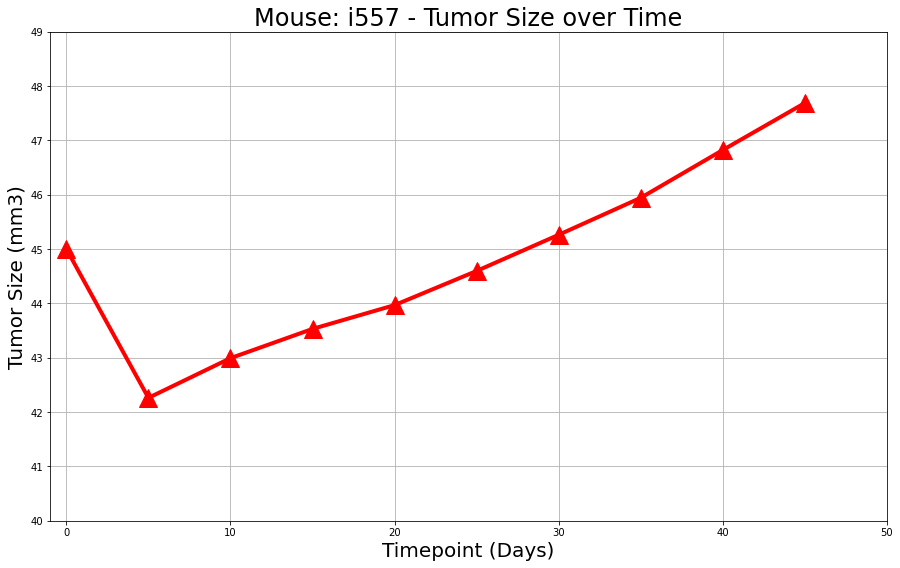

In [321]:
## Create a new Data Frame to hold all data for participants in Capomulin
capomulin_df = final_study_df.loc[final_study_df['Drug Regimen']=='Capomulin']
capomulin_df = capomulin_df.reset_index(drop=True)

## Pick a random mouse from Capomulin Data Frame
test = np.random.seed(0)
rand_mouse = capomulin_df.sample(test)
mouse = rand_mouse.iloc[0,0]

## With Random Mouse Selected, create data frame for mouse
mouse_df = clean_study_df.loc[clean_study_df['Mouse ID']==mouse]

xax = mouse_df['Timepoint']
yax = mouse_df['Tumor Volume (mm3)']
plt.figure(figsize=(15,9))
plt.plot(xax,yax,marker='^',color='r',linewidth=4,markersize=18,)
plt.title(f'Mouse: {mouse} - Tumor Size over Time',fontsize=24)
plt.xlabel('Timepoint (Days)',fontsize=20)
plt.ylabel('Tumor Size (mm3)',fontsize=20)
plt.xlim(-1,50)
plt.ylim(40,49)
plt.grid(which='major')

plt.show()

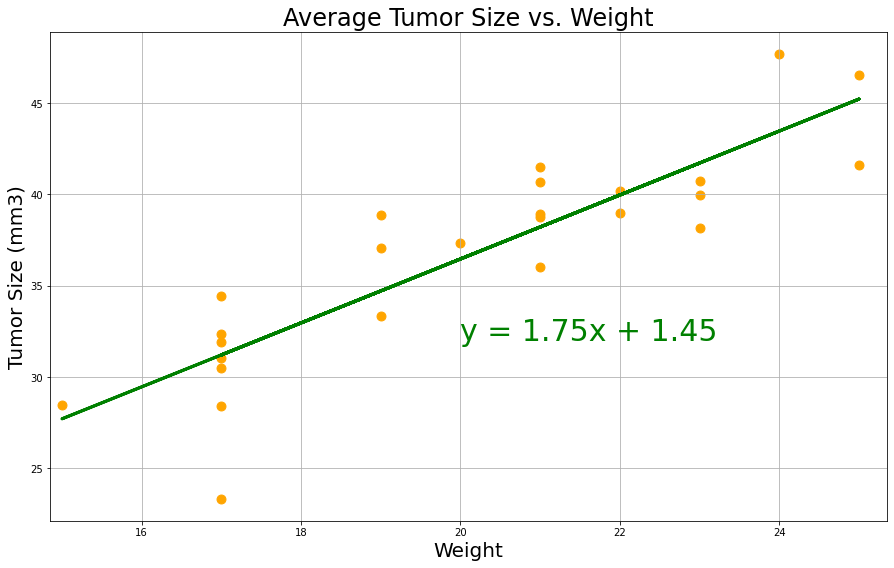

In [322]:
## Get average Tumor volume for each Mouse using groupby
ave_group_df = final_study_df.groupby(['Mouse ID','Drug Regimen']).mean()
ave_group_df = ave_group_df.reset_index(drop=False)

## create data frame for mice in Capomulin study
cap_ave_group_df = ave_group_df.loc[ave_group_df['Drug Regimen']=='Capomulin']

## Scatter Variables
weight = cap_ave_group_df['Weight (g)']
tumor_vol = cap_ave_group_df['Tumor Volume (mm3)']

## Scatter Plot
plt.figure(figsize=(15,9))
plt.scatter(weight,tumor_vol,s=80,color='orange',marker='o')
plt.title('Average Tumor Size vs. Weight',fontsize=24)
plt.xlabel('Weight',fontsize=20)
plt.ylabel('Tumor Size (mm3)',fontsize=20)
plt.xlim(14.85,25.35)
plt.grid(which='major')

## Linear Regression (y=mx+b)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(weight, tumor_vol)
lin_regress = slope*weight+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weight,lin_regress,color='green',linewidth=3)
plt.annotate(line_eq,(20,32),color='green',fontsize=30)


plt.show()

In [323]:
## Correlation

correlation = st.pearsonr(weight,ave_tumor_vol)
print(f'Correlation Coefficient: {round(correlation[0],3)}.\nThere is a strong positive correlation.')

Correlation Coefficient: 0.877.
There is a strong positive correlation.
